<a href="https://colab.research.google.com/github/artthuro6/Clasification_dolphin_seahorse/blob/main/Clasification_Dolphins_Seahorse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Explanation**

This project will create a model od Deep Learning to clasifier 2 diferente animals:

- Dolphins
- Seahorse

In this project. They will used 64 images of dolphins (Delfines) and 56 images of Seahorse (Caballitos de mar).


All the images were download to Google images. Dolphin and Seahorse.
 

All the images (dolphins and seahorse), were use to train. And we will search images in Instagram using [#dolphin](https://www.instagram.com/explore/tags/dolphins/). To data of test



# **Import Librerires**

In [65]:
# Importando Librerias a utilizar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from random import *
import random
import cv2 as cv
import os
from google.colab import files
import tensorflow as tf


# **Load images from Drive**

Cargando las imagenes directamente de mi Google drive.

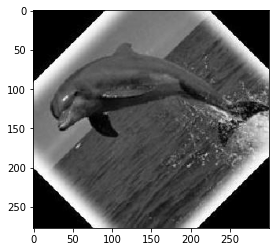

In [7]:
# Cargando las imagenes directamente de google drive

IMAGE_DIR = '/content/drive/MyDrive/IMAGENES/All_images/'

# Nombre de las carpetas con las imagenes (categorias)
CATEGORY = ['dolphin', 'seahorse']

# Imprimiendo las imagenes que se encuentran en cada archivo
for category in CATEGORY:
    path_animal = os.path.join(IMAGE_DIR, category)
    for image in os.listdir(path_animal):
        image_array = cv.imread(os.path.join(path_animal, image), cv.IMREAD_GRAYSCALE)
        plt.imshow(image_array, cmap='gray')
        plt.show()
        break
    break

In [16]:
# Guardando las imagenes de entrenamiento
IMG_SIZE = 50
train = []

for category in CATEGORY:
    path = os.path.join(IMAGE_DIR, category)
    number_class = CATEGORY.index(category)
    for image in os.listdir(path):
        try:
            array_image = cv.imread(os.path.join(path, image), cv.IMREAD_GRAYSCALE)
            new_array = cv.resize(array_image, (IMG_SIZE, IMG_SIZE))
            train.append([new_array, number_class])
        except Exception :
            pass

In [18]:
# Longitud de los datos de entrenamiento
len(train)

121

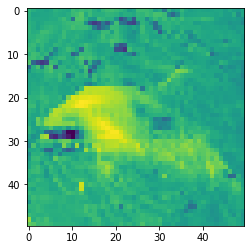

In [19]:
# Plotenado una una imagen randon
plt.imshow(train[randint(1, 120)][0])

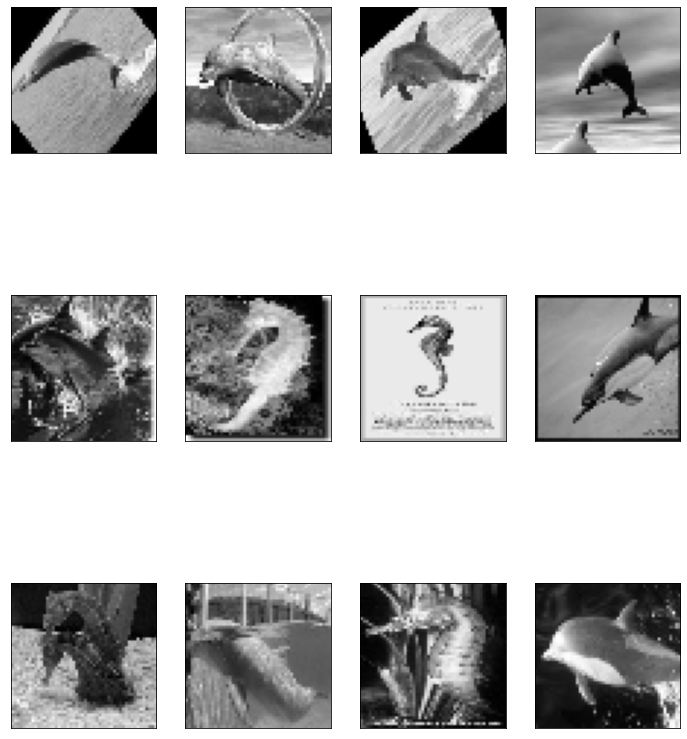

In [60]:
# Plotenado 12 imagenes random
plt.figure(figsize=(12,15))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid([])
    plt.imshow(train[randint(1, 121)][0], cmap=plt.get_cmap('gray'))

In [27]:
# Clases random
random.shuffle(train)


# Observando las clases
for example in train[:20]:
    print(example[1])

0
0
0
1
0
0
0
0
0
1
0
1
1
0
0
0
1
1
0
0


In [93]:
# Dividiendo las imagenes
x,y = [], []

for feature, label in train:
    x.append(feature)
    y.append(label)

# Arreglo de numpy para X
x = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [ ]:
x[0][0]

In [46]:
y[0]

0

# **Create Model (Deep Learning)**

In [55]:
from tensorflow import keras

In [94]:
x = np.array(x/255.0)
y = np.array(y)


In [99]:
x.shape

(121, 50, 50, 1)

In [113]:
""" Definiendo el modelo """

# 1. Creacion del modelo
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=32, 
                                 padding="same", 
                                 activation="relu",
                                 input_shape=x.shape[1:]))


model.add(tf.keras.layers.Conv2D(filters=32, 
                                 kernel_size=3, 
                                 padding="same", 
                                 activation="relu"))


model.add(tf.keras.layers.MaxPool2D(pool_size=2,
                                     strides=2,
                                     padding='valid'))


model.add(tf.keras.layers.Conv2D(filters=64, 
                                 kernel_size=3, 
                                 padding="same",
                                 activation="relu"))


model.add(tf.keras.layers.Conv2D(filters=64, 
                                 kernel_size=3, 
                                 padding="same", 
                                 activation="relu"))


model.add(tf.keras.layers.MaxPool2D(pool_size=2,
                                     strides=2,
                                     padding='valid'))


# Capa de Flattening
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))


# Capa de salida
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

""" Compilacion del modelo """

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [114]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 50, 50, 32)        32800     
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 50, 50, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 25, 25, 64)        18496     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 25, 25, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 9216)            

In [115]:
""" Entrenamiento de la Red Nueronal """

model.fit(x, y, validation_split=0.1, epochs=10)

Epoch 1/10
4/4 [==============================] - 6s 1s/step - loss: 1.5662 - accuracy: 0.5185 - val_loss: 1.0618 - val_accuracy: 0.4615
Epoch 2/10
4/4 [==============================] - 5s 1s/step - loss: 0.8499 - accuracy: 0.5463 - val_loss: 0.9367 - val_accuracy: 0.5385
Epoch 3/10
4/4 [==============================] - 5s 1s/step - loss: 0.8545 - accuracy: 0.4537 - val_loss: 0.7005 - val_accuracy: 0.4615
Epoch 4/10
4/4 [==============================] - 5s 1s/step - loss: 0.7955 - accuracy: 0.5185 - val_loss: 0.6871 - val_accuracy: 0.5385
Epoch 5/10
4/4 [==============================] - 5s 1s/step - loss: 0.7013 - accuracy: 0.5093 - val_loss: 0.6912 - val_accuracy: 0.5385
Epoch 6/10
4/4 [==============================] - 5s 1s/step - loss: 0.6823 - accuracy: 0.6204 - val_loss: 0.6778 - val_accuracy: 0.6154
Epoch 7/10
4/4 [==============================] - 5s 1s/step - loss: 0.6738 - accuracy: 0.6296 - val_loss: 0.6507 - val_accuracy: 0.6154
Epoch 8/10
4/4 [=========================